
##**Project Title**: Health Care Chat Bot

**Problem**: The healthcare industry faces a significant challenge in providing timely and accurate medical advice to patients. Many individuals experience symptoms and seek quick, reliable information about their possible conditions, but often encounter long wait times for medical consultations or turn to unreliable sources on the internet. This delay in receiving proper medical guidance can lead to worsening health conditions or unnecessary anxiety.

To address this issue, we propose the development of a Healthcare Chatbot based on advanced Machine Learning and Deep Learning algorithms. This chatbot will interact with users, asking relevant questions about their symptoms and health history. By leveraging a trained model on a comprehensive healthcare dataset, the chatbot will provide users with detailed information about potential conditions and offer preliminary advice. This tool aims to empower users with quick and reliable health information, potentially guiding them towards appropriate medical care when necessary.

The primary objective is to create an accessible, efficient, and accurate healthcare chatbot that can assist users in identifying possible health issues based on their symptoms and provide them with actionable advice, thereby improving health outcomes and reducing the burden on healthcare professionals.

In [1]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

#####Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


#####Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
patient_profile_df=pd.read_csv('/content/drive/MyDrive/Interview_question_solved/Project/NLP_Project/dataset/Disease_symptom_and_patient_profile_dataset.csv')

In [5]:
symptom_description_df=pd.read_csv('/content/drive/MyDrive/Interview_question_solved/Project/NLP_Project/dataset/Symptoms dataset/symptom_Description.csv')

In [6]:
symptom_df=pd.read_csv('/content/drive/MyDrive/Interview_question_solved/Project/NLP_Project/dataset/Symptoms dataset/Symptom.csv')

#####Print the first rows and Check for null values

In [7]:
patient_profile_df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [8]:
patient_profile_df.isnull().sum()

,0
Disease,0
Fever,0
Cough,0
Fatigue,0
Difficulty Breathing,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Outcome Variable,0


In [9]:
symptom_description_df.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [10]:
symptom_description_df.isnull().sum()

,0
Disease,0
Description,0


In [11]:
symptom_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
def missing_value():
  missing=symptom_df.columns[symptom_df.isnull().any()].tolist()
  return missing
print("Missing value")
print(symptom_df[missing_value()].isnull().sum().sort_values(ascending=False))
print('---'*50)
print('Missing value in percentage')
print(round(symptom_df[missing_value()].isnull().sum().sort_values(ascending=False)/len(symptom_df)*100,2))

Missing value
Symptom_17    4848
Symptom_16    4728
Symptom_15    4680
Symptom_14    4614
Symptom_13    4416
Symptom_12    4176
Symptom_11    3726
Symptom_10    3408
Symptom_9     3228
Symptom_8     2976
Symptom_7     2652
Symptom_6     1986
Symptom_5     1206
Symptom_4      348
dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Missing value in percentage
Symptom_17    98.54
Symptom_16    96.10
Symptom_15    95.12
Symptom_14    93.78
Symptom_13    89.76
Symptom_12    84.88
Symptom_11    75.73
Symptom_10    69.27
Symptom_9     65.61
Symptom_8     60.49
Symptom_7     53.90
Symptom_6     40.37
Symptom_5     24.51
Symptom_4      7.07
dtype: float64


#####Drop the columns which has more than 50% missing values

In [13]:
# Calculate the percentage of missing values for each column
missing_percentage = symptom_df.isnull().mean() * 100

In [14]:
# Drop columns where the missing percentage is more than 50%
columns_to_drop = missing_percentage[missing_percentage > 50].index
symptom_df_cleaned = symptom_df.drop(columns=columns_to_drop)

In [15]:
# Check the shape of the cleaned dataframe
print("Shape of cleaned dataframe:", symptom_df_cleaned.shape)

Shape of cleaned dataframe: (4920, 7)


In [16]:
# Fill missing values with 'unknown' for the remaining columns
symptom_df_cleaned = symptom_df_cleaned.fillna('unknown')

In [17]:
# Verify no missing values remain
print(symptom_df_cleaned.isnull().sum())

Disease      0
Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
Symptom_5    0
Symptom_6    0
dtype: int64


In [18]:
symptom_df_cleaned.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,unknown,unknown
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,unknown,unknown,unknown
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,unknown,unknown,unknown
3,Fungal infection,itching,skin_rash,dischromic _patches,unknown,unknown,unknown
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,unknown,unknown,unknown


In [19]:
symptom_df_cleaned.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,0
Symptom_5,0
Symptom_6,0


In [20]:
symptom_df_cleaned.tail()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,unknown,unknown
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,unknown,unknown
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails
4919,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,unknown


#####Print the shape of the dataset

In [22]:
print(patient_profile_df.shape)
print(symptom_description_df.shape)
print(symptom_df_cleaned.shape)

(349, 10)
(41, 2)
(4920, 7)


#####Merging the dataframe

In [23]:
#Merge patient_profile_df with symptom_description_df
merged_df_1 = pd.merge(patient_profile_df, symptom_description_df, on='Disease', how='left')
#Merge the result with symptom_df_cleaned
merged_df_2 = pd.merge(merged_df_1, symptom_df_cleaned, on='Disease', how='left')

In [25]:
merged_df_2.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Description,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,fatigue,cough,high_fever,headache
2,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,fatigue,cough,high_fever,headache
3,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,chills,fatigue,cough,high_fever,headache,swelled_lymph_nodes
4,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,fatigue,cough,high_fever,headache,swelled_lymph_nodes


#####Check the missing values and fill the missing values

In [26]:
merged_df_2.isnull().sum()

,0
Disease,0
Fever,0
Cough,0
Fatigue,0
Difficulty Breathing,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Outcome Variable,0


#####Fill the missing values

In [28]:
# Fill missing values in symptom columns
symptom_columns = [f'Symptom_{i}' for i in range(1, 7)]
merged_df_2[symptom_columns] = merged_df_2[symptom_columns].fillna('Unknown')

In [31]:
# Fill missing values in Description_x and Description_y
merged_df_2['Description'] = merged_df_2['Description'].fillna('Unknown')

In [32]:
# Verify that there are no missing values
print(merged_df_2.isnull().sum())

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
Description             0
Symptom_1               0
Symptom_2               0
Symptom_3               0
Symptom_4               0
Symptom_5               0
Symptom_6               0
dtype: int64


In [33]:
merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7251 entries, 0 to 7250
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               7251 non-null   object
 1   Fever                 7251 non-null   object
 2   Cough                 7251 non-null   object
 3   Fatigue               7251 non-null   object
 4   Difficulty Breathing  7251 non-null   object
 5   Age                   7251 non-null   int64 
 6   Gender                7251 non-null   object
 7   Blood Pressure        7251 non-null   object
 8   Cholesterol Level     7251 non-null   object
 9   Outcome Variable      7251 non-null   object
 10  Description           7251 non-null   object
 11  Symptom_1             7251 non-null   object
 12  Symptom_2             7251 non-null   object
 13  Symptom_3             7251 non-null   object
 14  Symptom_4             7251 non-null   object
 15  Symptom_5             7251 non-null   

#####Rename the columns

In [35]:
# Verify the changes
merged_df_2.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Description,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,fatigue,cough,high_fever,headache
2,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,fatigue,cough,high_fever,headache
3,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,chills,fatigue,cough,high_fever,headache,swelled_lymph_nodes
4,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,fatigue,cough,high_fever,headache,swelled_lymph_nodes


In [36]:
# Verify the changes
merged_df_2.shape

(7251, 17)

In [38]:
# Create a new column to count 'Unknown' values in all columns
merged_df_2['Unknown_Count'] = merged_df_2.apply(lambda row: (row == 'Unknown').sum(), axis=1)

In [39]:
# Display the first few rows to see the 'Unknown_Count' column
print(merged_df_2[['Disease', 'Unknown_Count']].head())

       Disease  Unknown_Count
0    Influenza              7
1  Common Cold              0
2  Common Cold              0
3  Common Cold              0
4  Common Cold              0


In [41]:
# Now drop rows where all columns have 'Unknown'
cleaned_df = merged_df_2[merged_df_2['Unknown_Count'] < len(merged_df_2.columns) - 1]

In [42]:
# Drop the 'Unknown_Count' column as it is no longer needed
cleaned_df = cleaned_df.drop(columns=['Unknown_Count'])

In [43]:
cleaned_df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Description,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,fatigue,cough,high_fever,headache
2,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,fatigue,cough,high_fever,headache
3,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,chills,fatigue,cough,high_fever,headache,swelled_lymph_nodes
4,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,fatigue,cough,high_fever,headache,swelled_lymph_nodes


In [44]:
cleaned_df.shape

(7251, 17)

In [45]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7251 entries, 0 to 7250
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               7251 non-null   object
 1   Fever                 7251 non-null   object
 2   Cough                 7251 non-null   object
 3   Fatigue               7251 non-null   object
 4   Difficulty Breathing  7251 non-null   object
 5   Age                   7251 non-null   int64 
 6   Gender                7251 non-null   object
 7   Blood Pressure        7251 non-null   object
 8   Cholesterol Level     7251 non-null   object
 9   Outcome Variable      7251 non-null   object
 10  Description           7251 non-null   object
 11  Symptom_1             7251 non-null   object
 12  Symptom_2             7251 non-null   object
 13  Symptom_3             7251 non-null   object
 14  Symptom_4             7251 non-null   object
 15  Symptom_5             7251 non-null   

In [47]:
# Convert columns to string type
merged_df_2 = merged_df_2.astype(str)

In [48]:
merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7251 entries, 0 to 7250
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               7251 non-null   object
 1   Fever                 7251 non-null   object
 2   Cough                 7251 non-null   object
 3   Fatigue               7251 non-null   object
 4   Difficulty Breathing  7251 non-null   object
 5   Age                   7251 non-null   object
 6   Gender                7251 non-null   object
 7   Blood Pressure        7251 non-null   object
 8   Cholesterol Level     7251 non-null   object
 9   Outcome Variable      7251 non-null   object
 10  Description           7251 non-null   object
 11  Symptom_1             7251 non-null   object
 12  Symptom_2             7251 non-null   object
 13  Symptom_3             7251 non-null   object
 14  Symptom_4             7251 non-null   object
 15  Symptom_5             7251 non-null   

In [49]:
# Count the number of 'Unknown' values for each column
unknown_counts = merged_df_2.apply(lambda x: x.str.contains('Unknown').sum())

In [50]:
# Display the count of 'Unknown' values for each column
print(unknown_counts)

Disease                   0
Fever                     0
Cough                     0
Fatigue                   0
Difficulty Breathing      0
Age                       0
Gender                    0
Blood Pressure            0
Cholesterol Level         0
Outcome Variable          0
Description             271
Symptom_1               291
Symptom_2               291
Symptom_3               291
Symptom_4               291
Symptom_5               291
Symptom_6               291
Unknown_Count             0
dtype: int64


In [51]:
# Drop rows where any column contains 'Unknown'
cleaned_df = merged_df_2[~merged_df_2.apply(lambda x: x.str.contains('Unknown')).any(axis=1)]

In [52]:
cleaned_df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Description,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Unknown_Count
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,fatigue,cough,high_fever,headache,0
2,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,fatigue,cough,high_fever,headache,0
3,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,chills,fatigue,cough,high_fever,headache,swelled_lymph_nodes,0
4,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,fatigue,cough,high_fever,headache,swelled_lymph_nodes,0
5,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,cough,high_fever,headache,swelled_lymph_nodes,0


In [53]:
print(cleaned_df.shape)

(6960, 18)


In [54]:
cleaned_df['Unknown_Count'].value_counts()

,count
Unknown_Count,
0,6960


In [55]:
# Drop the 'Unknown_Count' column
cleaned_df = cleaned_df.drop(columns=['Unknown_Count'])

#####Cleaned datasets

In [56]:
cleaned_df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Description,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,fatigue,cough,high_fever,headache
2,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,fatigue,cough,high_fever,headache
3,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,chills,fatigue,cough,high_fever,headache,swelled_lymph_nodes
4,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,fatigue,cough,high_fever,headache,swelled_lymph_nodes
5,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,cough,high_fever,headache,swelled_lymph_nodes


###EDA

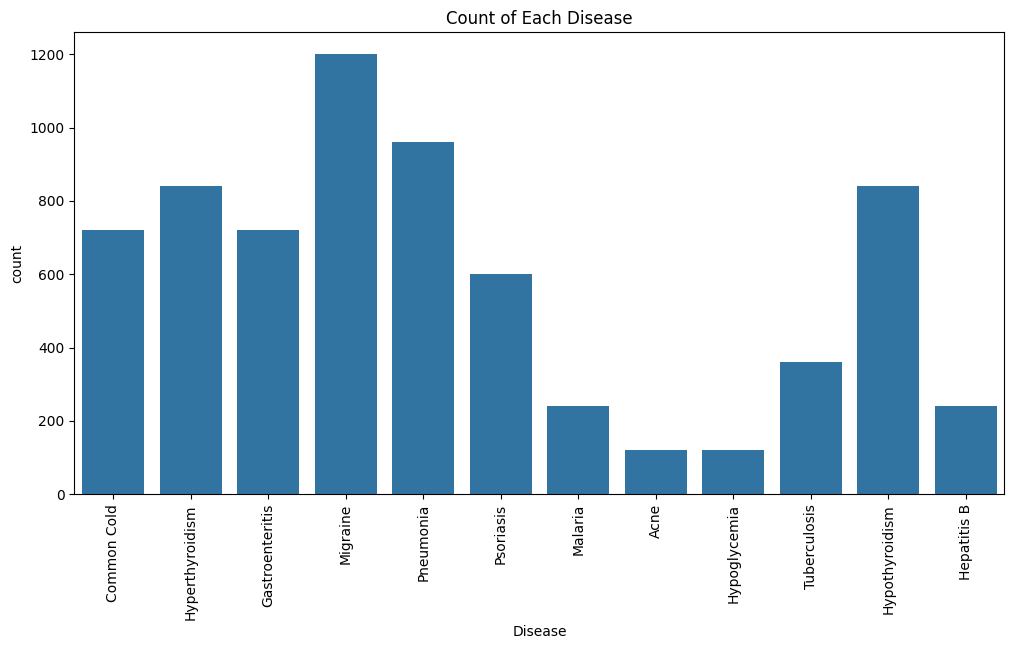

In [57]:
#Count Plot for Disease
plt.figure(figsize=(12, 6))
sns.countplot(x='Disease', data=cleaned_df)
plt.title('Count of Each Disease')
plt.xticks(rotation=90)
plt.show()

In the plot, people with migraine are the most prevalent, followed by pneumonia and hypothyroidism.

* Migraine: A migraine is a severe headache that typically causes intense throbbing or a pulsing sensation on one side of the head. It is often accompanied by nausea, vomiting, and extreme sensitivity to light and sound.

* Pneumonia: Pneumonia is an infection of one or both lungs caused by bacteria, viruses, or fungi. The most common symptom is a cough that produces green, yellow, or bloody mucus.

* Hypothyroidism: Hypothyroidism occurs when the thyroid gland does not produce enough thyroid hormone, also known as an underactive thyroid.

Conclusion : The data shows that symptoms like headache, nausea, and vomiting are common among people with these diseases. Migraine is the most common, indicating a high prevalence of severe headaches among the population. Pneumonia, often caused by exposure to harmful bacteria, viruses, or fungi, is the second most common, highlighting the impact of environmental factors on health. Hypothyroidism, caused by an underactive thyroid, is also prevalent, indicating a significant number of individuals with thyroid hormone deficiencies.

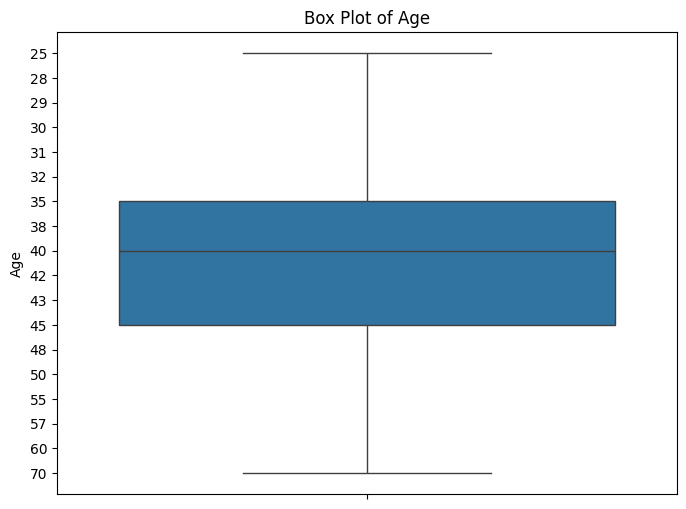

In [58]:
#Box Plot for Age
plt.figure(figsize=(8, 6))
sns.boxplot(y='Age', data=cleaned_df)
plt.title('Box Plot of Age')
plt.show()

* In this dataset most people are aged between 35 to 45 years

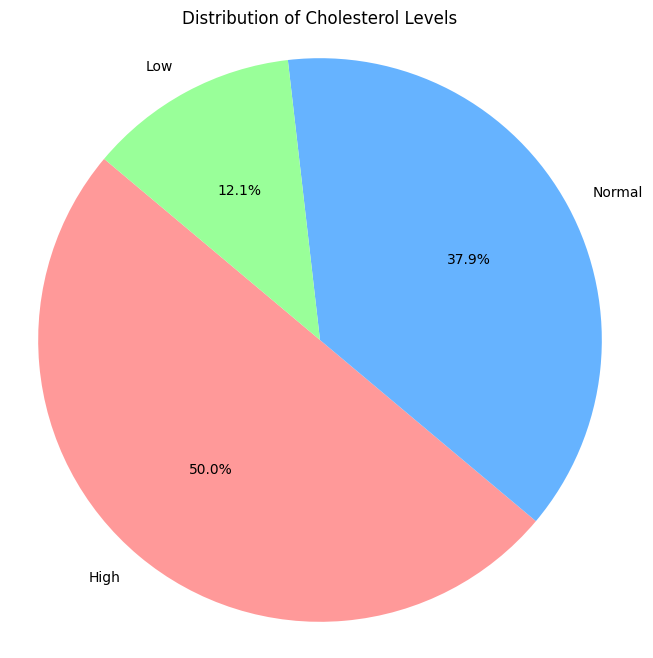

In [59]:
# Pie Chart for Cholesterol Level
cholesterol_counts = cleaned_df['Cholesterol Level'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cholesterol_counts, labels=cholesterol_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Cholesterol Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

* Most people suffer with High Cholesterol Level followed by normal and low. Almost 50% of data in this table suffer from high cholesterol

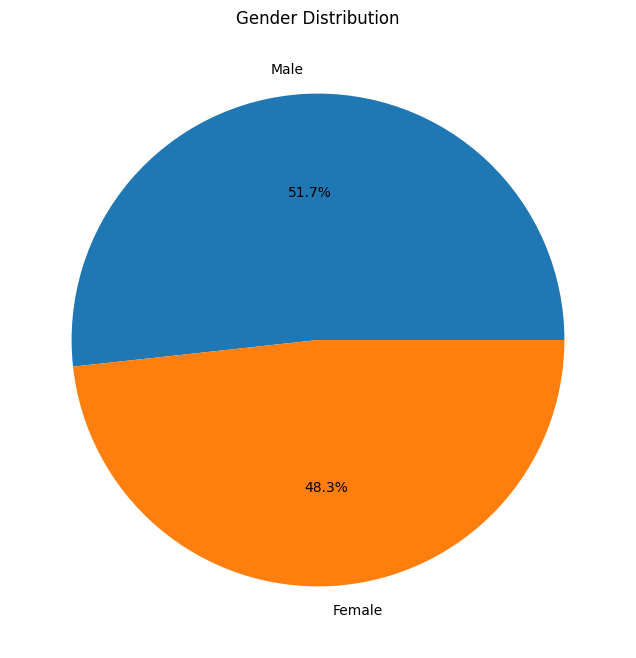

In [60]:
#Pie Chart for Gender Distribution
plt.figure(figsize=(8, 8))
cleaned_df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

* 51.7% are males and 48.3% are female dataset

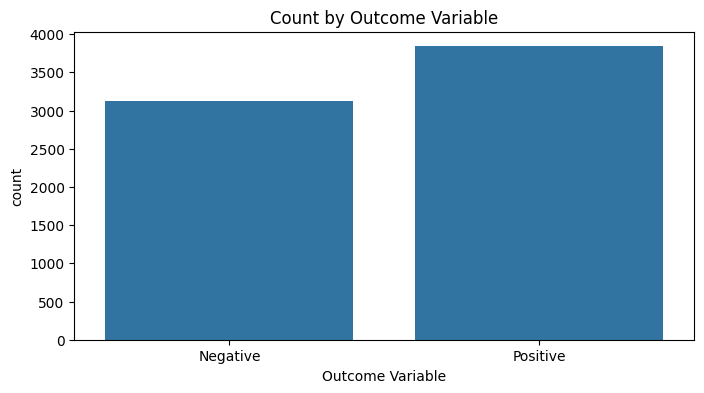

In [61]:
#Count Plot for Outcome Variable
plt.figure(figsize=(8, 4))
sns.countplot(x='Outcome Variable', data=cleaned_df)
plt.title('Count by Outcome Variable')
plt.show()

* Positive Outcomes are more compare to negative outcome. So positive outcome are 3900 and negative outcome are 3200

<Figure size 1200x800 with 0 Axes>

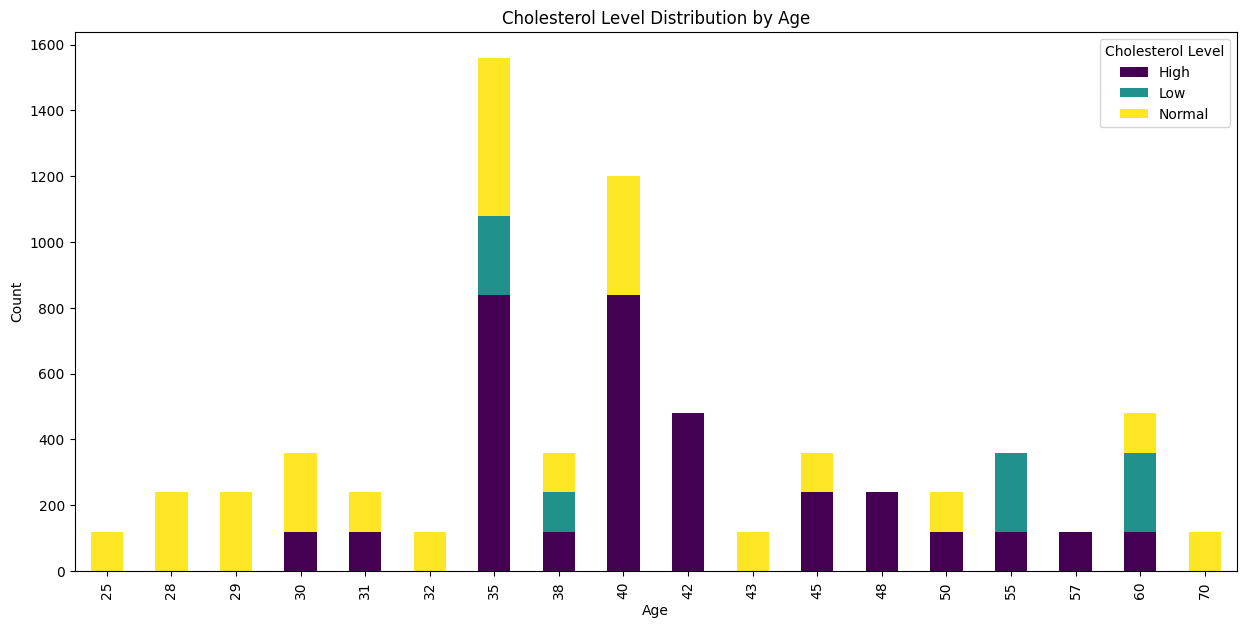

In [62]:
# Count occurrences of each cholesterol level by age
cholesterol_by_age = cleaned_df.groupby(['Age', 'Cholesterol Level']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 8))
cholesterol_by_age.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 7))
plt.title('Cholesterol Level Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Cholesterol Level')
plt.show()

* Prevalence of Normal Cholesterol: Across all age groups, the "Normal" category (yellow) consistently occupies the largest portion of each bar. This suggests that a majority of individuals maintain normal cholesterol levels regardless of age.

* Increasing High Cholesterol with Age: There seems to be a general trend of increasing "High" cholesterol (dark blue) as age progresses. While the prevalence of high cholesterol is relatively low in younger age groups, it becomes more pronounced in the middle and older age groups.

* Low Cholesterol Distribution: The "Low" cholesterol category (teal) appears less frequent across all age groups compared to the other two categories. Its distribution seems relatively stable, with no significant patterns observed with age.

* Age Groups with Notable High Cholesterol: The age groups 35, 40, and 42 stand out with particularly high proportions of individuals in the "High" cholesterol category. These age groups may warrant further investigation or targeted interventions for cholesterol management.

Overall, the chart provides valuable insights into the relationship between age and cholesterol levels. It highlights the increasing risk of high cholesterol with age and identifies specific age groups that may require greater attention in terms of cholesterol management.

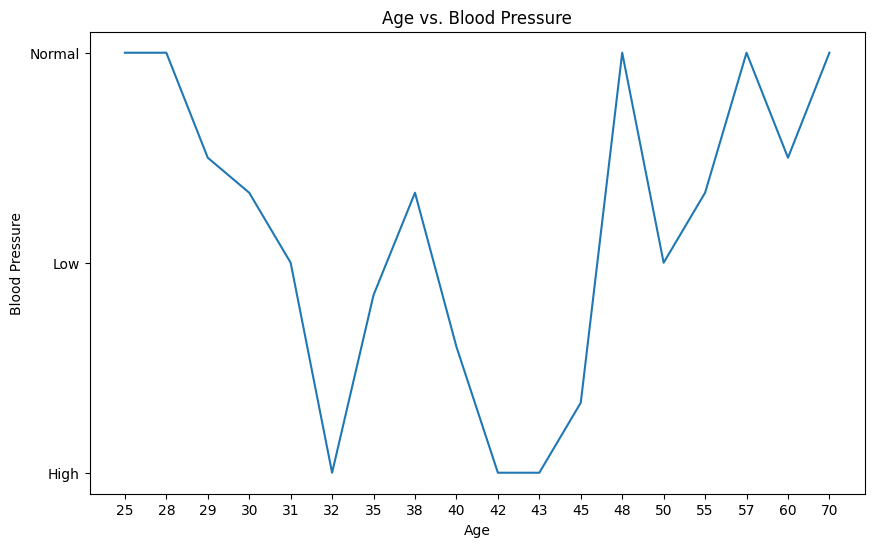

In [63]:
# Line Plot: Age vs. Blood Pressure
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Blood Pressure', data=cleaned_df, ci=None)
plt.title('Age vs. Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

* Variability in Blood Pressure: The line's fluctuations demonstrate that blood pressure is not consistently high or low throughout life. It varies across different age groups.

* Normal Range Dominance: While the line touches all three categories, it spends a significant portion within the "Normal" range, suggesting that normal blood pressure is prevalent across most ages.

* Age-Related Fluctuations: There are noticeable peaks and troughs in the line, indicating periods where blood pressure tends to be higher or lower. Further analysis with actual data points would be necessary to pinpoint specific age ranges associated with these fluctuations.

* Potential for Further Insights: To gain deeper understanding, the chart could benefit from additional information such as:

* Average blood pressure values within each age group.
The number of individuals represented at each age point.
Differentiation between genders or other relevant demographic factors.

Overall, the chart provides a preliminary overview of the relationship between age and blood pressure. It highlights the dynamic nature of blood pressure across the lifespan and suggests potential areas for further investigation.

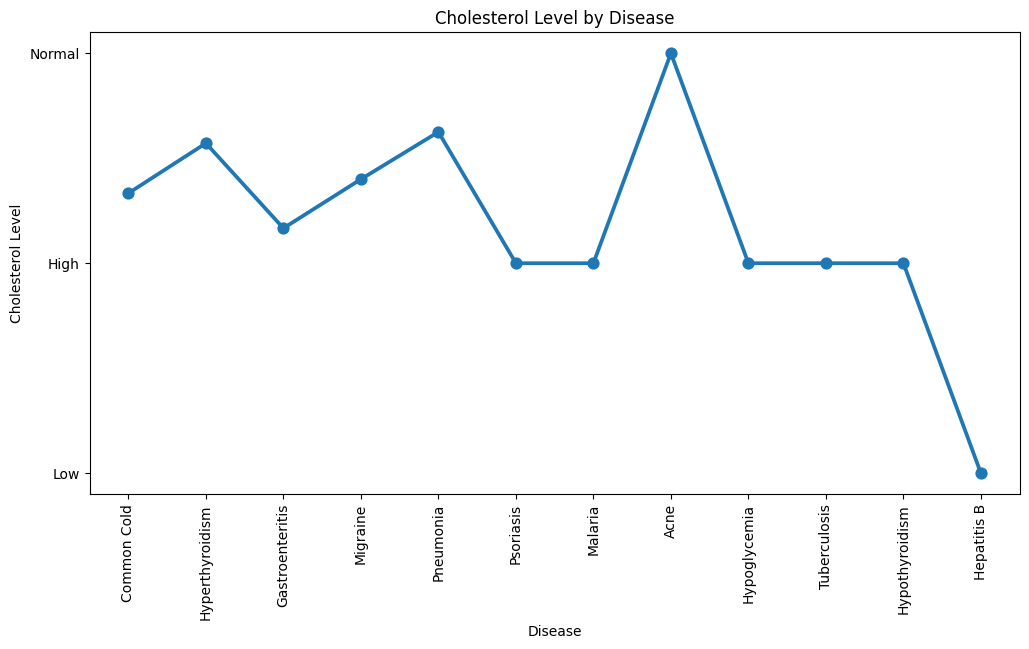

In [64]:
# Point Plot: Cholesterol Level by Disease
plt.figure(figsize=(12, 6))
sns.pointplot(x='Disease', y='Cholesterol Level', data=cleaned_df, estimator=np.mean, ci=None)
plt.title('Cholesterol Level by Disease')
plt.xticks(rotation=90)
plt.show()

* Wide Variation in Cholesterol Levels: The chart exhibits significant fluctuations in cholesterol levels across different diseases. This suggests a complex relationship between diseases and cholesterol.

* Predominance of Normal Cholesterol: While there are peaks and troughs, the majority of data points fall within the "Normal" cholesterol range. This implies that many diseases do not have a substantial impact on cholesterol levels.

* Extreme Outliers: A few diseases, such as Acne and Malaria, show exceptionally high cholesterol levels. These outliers warrant further investigation to understand the underlying causes.

* No Apparent Correlation: There isn't a clear pattern or trend observable in the data. Cholesterol levels seem to vary independently for each disease.

* Disease-Specific Cholesterol Research: Diseases with consistently high or low cholesterol levels could be targeted for further research to understand the underlying mechanisms.

* Other Factors: Factors like age, diet, and lifestyle can influence cholesterol levels. Incorporating these variables could reveal more comprehensive relationships.

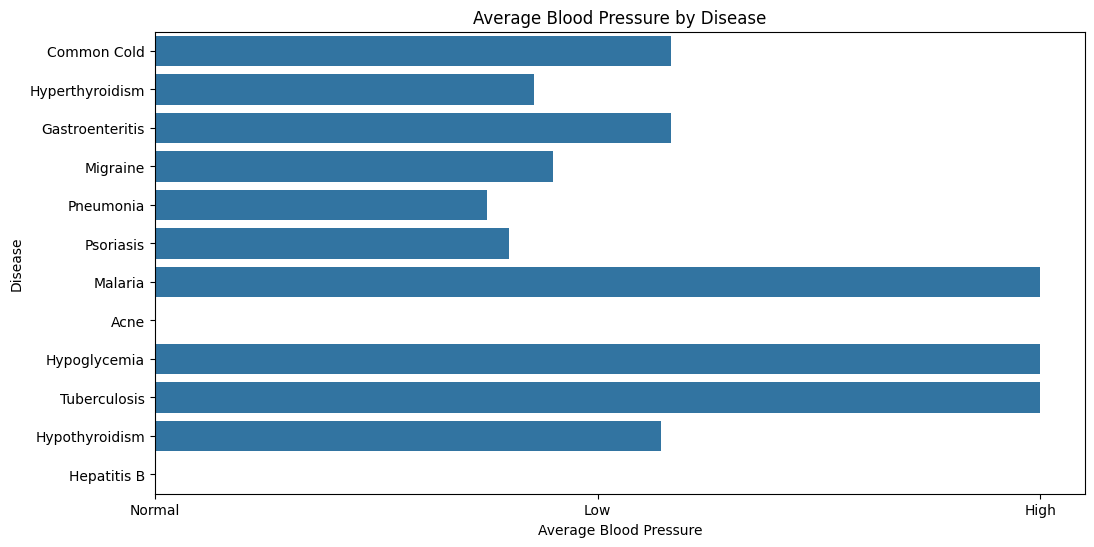

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Blood Pressure', y='Disease', data=cleaned_df, estimator=np.mean, ci=None, orient='h')
plt.title('Average Blood Pressure by Disease')
plt.xlabel('Average Blood Pressure')
plt.ylabel('Disease')
plt.xticks(rotation=0)
plt.show()

* Consistent Normal Blood Pressure: The chart shows that the average blood pressure for all diseases falls within the "Normal" category. This suggests that these specific diseases do not significantly impact blood pressure levels on average.

* Limited Variability: There is minimal variation in blood pressure levels across the different diseases. This indicates a lack of strong correlation between these diseases and blood pressure.

* Data Limitations: The chart only presents average blood pressure values, providing limited insight into the distribution of blood pressure within each disease group.
Potential Insights:

* Focus on Other Factors: Since blood pressure doesn't seem to be significantly affected by these diseases, it might be beneficial to explore other factors that influence blood pressure, such as lifestyle, age, or genetics.
Data Enrichment: To gain deeper insights, consider adding more diseases to the chart or incorporating additional metrics like blood pressure ranges or standard deviations.

* Disease-Specific Studies: While these diseases don't appear to have a significant impact on average blood pressure, specific studies focusing on individual diseases might reveal subtle correlations or underlying trends.

Overall, the chart suggests that these particular diseases have a minimal impact on average blood pressure levels. Further investigation into other factors or with a larger dataset might provide more valuable insights.

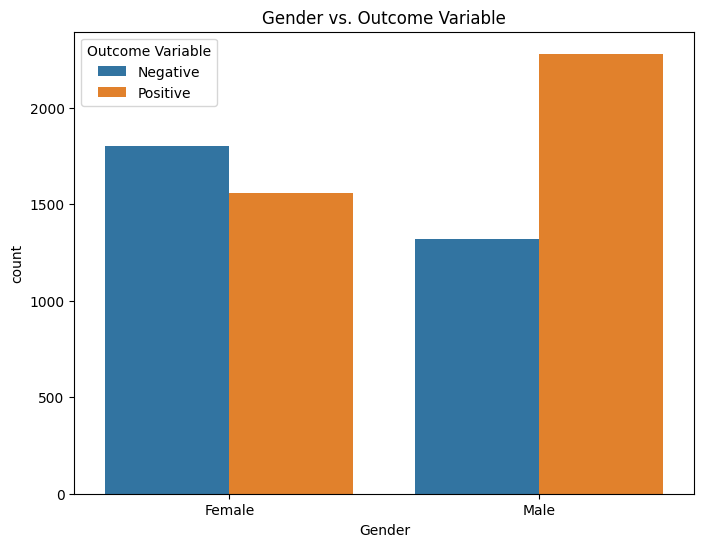

In [66]:
#Count Plot: Gender vs. Outcome Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Outcome Variable', data=cleaned_df)
plt.title('Gender vs. Outcome Variable')
plt.show()

* Higher Prevalence of Positive Outcomes in Males: The bar representing "Positive" outcomes for males is significantly taller than the corresponding bar for females. This suggests a higher prevalence of positive outcomes among males.

* Larger Sample Size of Females: The total count of females (sum of both positive and negative outcomes) appears to be larger than the total count of males.

The data suggests a potential association between gender and the outcome variable, with males exhibiting a higher rate of positive outcomes.

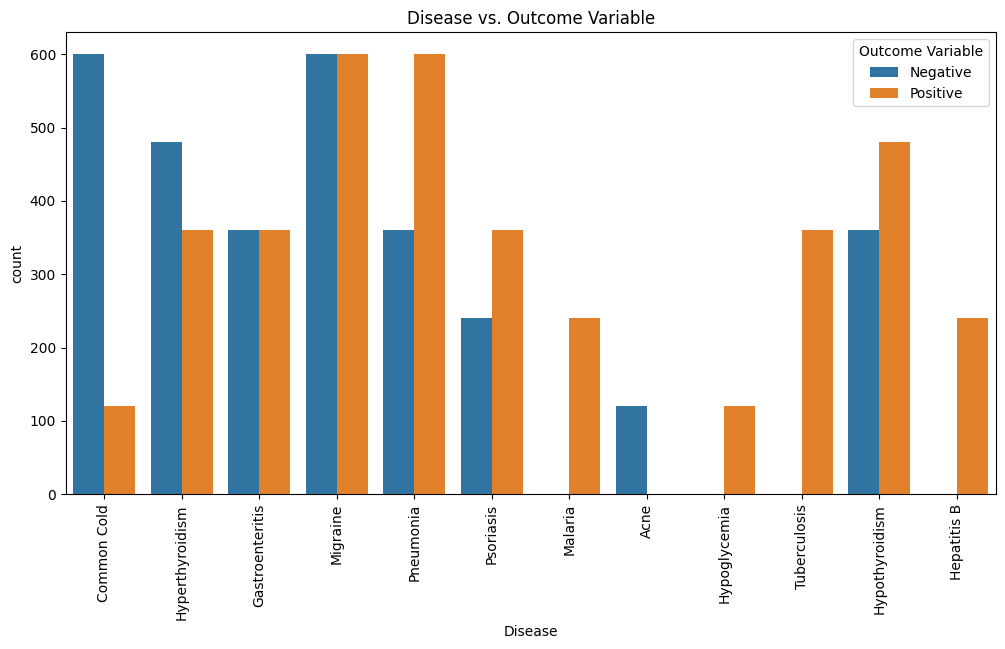

In [67]:
#Count Plot: Disease vs. Outcome Variable
plt.figure(figsize=(12, 6))
sns.countplot(x='Disease', hue='Outcome Variable', data=cleaned_df)
plt.title('Disease vs. Outcome Variable')
plt.xticks(rotation=90)
plt.show()

* Variability in Outcome Counts: The number of individuals with positive and negative outcomes varies significantly across different diseases. This suggests that the relationship between disease and outcome is complex.

* Dominance of Negative Outcomes: For most diseases, the count of negative outcomes is higher than the count of positive outcomes. This indicates a general trend towards negative outcomes across the studied population.
Disease-Specific Patterns: Some diseases, such as Hyperthyroidism and Hypothyroidism, show a noticeable difference in outcome counts. This suggests potential associations between these specific diseases and the outcome variable.

* Outliers: Diseases with extremely high or low counts of positive or negative outcomes (e.g., Acne, Malaria) might warrant further investigation to understand the underlying factors.
Potential Insights:

* Disease-Specific Analysis: Focusing on diseases with notable differences in outcome counts can help identify potential risk factors or protective factors associated with the outcome.

Overall, the chart provides a preliminary overview of the relationship between disease and outcome. It highlights the variability across diseases and identifies potential areas for further investigation.

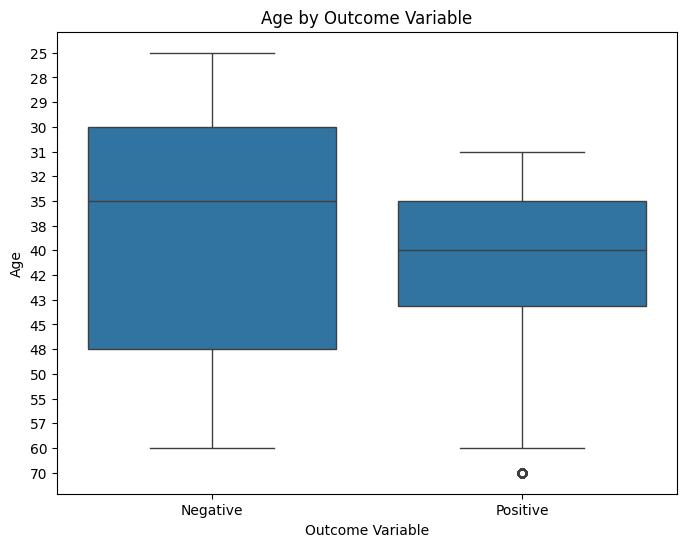

In [68]:
#Box Plot: Age by Outcome Variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome Variable', y='Age', data=cleaned_df)
plt.title('Age by Outcome Variable')
plt.show()

* Median Age Difference: The median age (the line within the box) is higher for the "Positive" outcome group compared to the "Negative" outcome group. This suggests that individuals with a positive outcome tend to be older on average.
Overlapping Age Ranges: The boxes representing the interquartile range (IQR) for both groups overlap significantly, indicating that there's considerable overlap in the age distribution between the two groups.

* Age as a Potential Predictor: The higher median age for the "Positive" outcome group suggests that age could be a potential predictor or risk factor for the positive outcome. However, the overlap in age ranges indicates that age alone cannot reliably differentiate between the two groups.

Overall, the box plot provides a visual summary of the age distribution for both outcome groups. While it suggests a potential association between age and outcome, further analysis is needed to establish a definitive relationship.

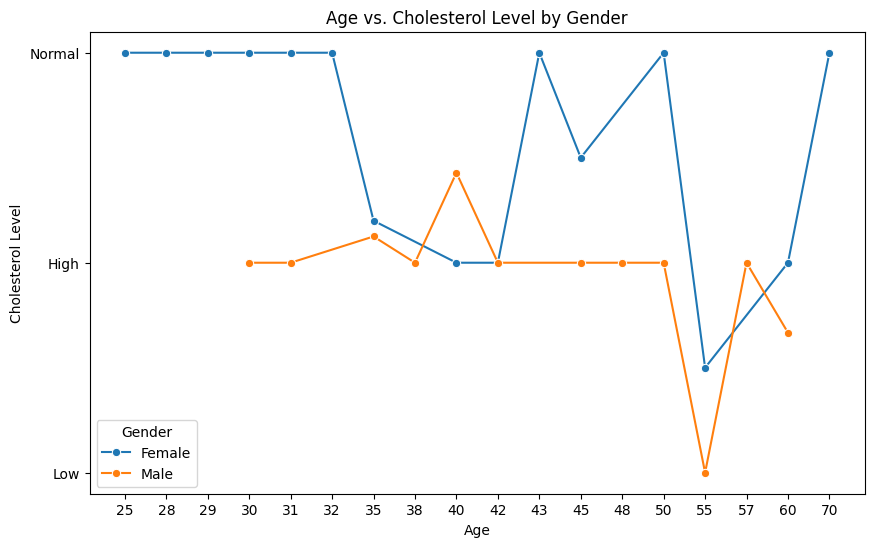

In [69]:
# Line Plot: Age vs. Cholesterol Level by Gender
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Cholesterol Level', hue='Gender', data=cleaned_df, marker='o', ci=None)
plt.title('Age vs. Cholesterol Level by Gender')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.legend(title='Gender')
plt.show()

* Gender Disparities: There's a noticeable difference in cholesterol levels between genders, particularly in the middle age range (30-45).
Women tend to have more fluctuations in cholesterol levels, with periods of higher cholesterol. Men show a more stable cholesterol profile, generally remaining in the "Normal" range.

* Both genders exhibit variations in cholesterol levels across different age groups. There seems to be a general trend towards higher cholesterol levels with increasing age, although with significant individual variations.
Data Sparsity:

* Potential Insights:Targeted Interventions: The observed gender differences in cholesterol levels suggest the need for tailored prevention and management strategies for each gender.

* Risk Factors: Identifying factors that contribute to cholesterol fluctuations in women could be a focus for future research.

Overall, the chart provides a preliminary overview of the relationship between age, gender, and cholesterol levels. While it highlights potential gender disparities and age-related changes, further research is needed to establish definitive conclusions.

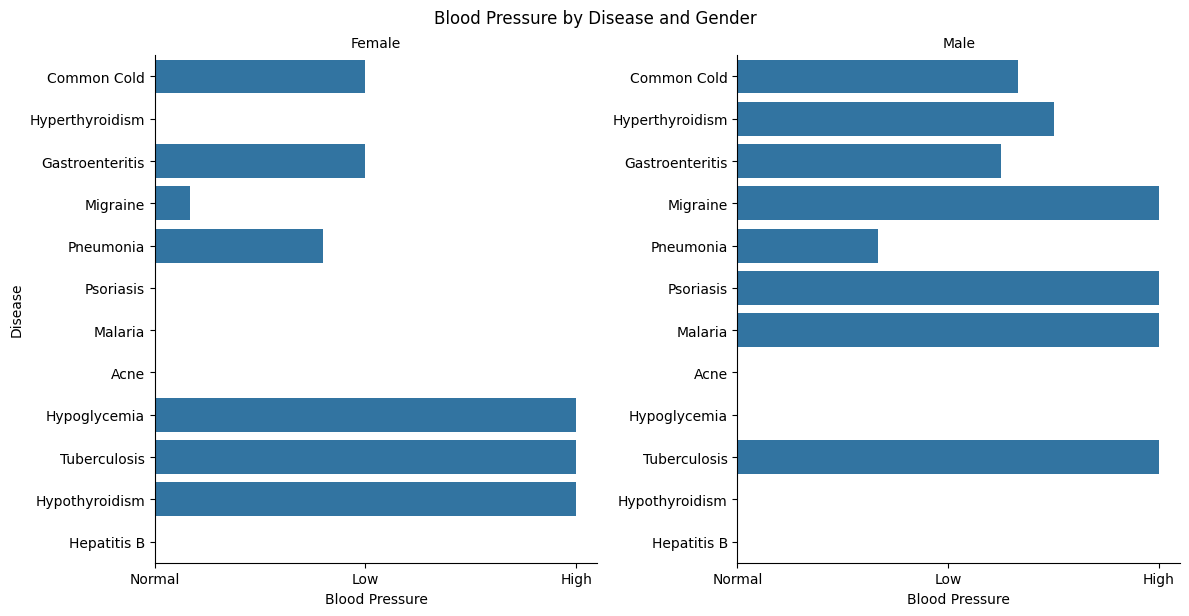

In [70]:
# Create the FacetGrid
g = sns.FacetGrid(cleaned_df, col="Gender", height=6, aspect=1, sharey=False)

# Map the horizontal bar plot function onto the grid
g.map(sns.barplot, "Blood Pressure", "Disease", order=cleaned_df['Disease'].unique(), ci=None, orient='h')

# Set titles and labels
g.set_axis_labels('Blood Pressure', 'Disease')
g.set_titles(col_template="{col_name}")

# Adjust the space to fit the suptitle
g.fig.suptitle('Blood Pressure by Disease and Gender', y=1.02)

# Show the plot
plt.show()

* Gender Differences: There appears to be a noticeable difference in blood pressure levels between genders for certain diseases. For instance, some diseases show higher instances of "High" blood pressure in males compared to females. However, the overall pattern suggests that gender-based differences in blood pressure are not consistent across all diseases.

* Disease-Specific Blood Pressure Patterns: Some diseases seem to be associated with specific blood pressure levels. For example, certain diseases have a higher prevalence of "Low" blood pressure. However, without numerical data or statistical analysis, it's difficult to determine the statistical significance of these patterns.

* Potential Insights: Gender-Specific Disease Management: The observed gender differences in blood pressure for certain diseases suggest the need for tailored treatment and prevention strategies.

* Disease-Focused Research: Identifying diseases associated with specific blood pressure levels could guide further research into the underlying causes and potential interventions.

Overall, the chart provides a preliminary overview of the relationship between disease, gender, and blood pressure.

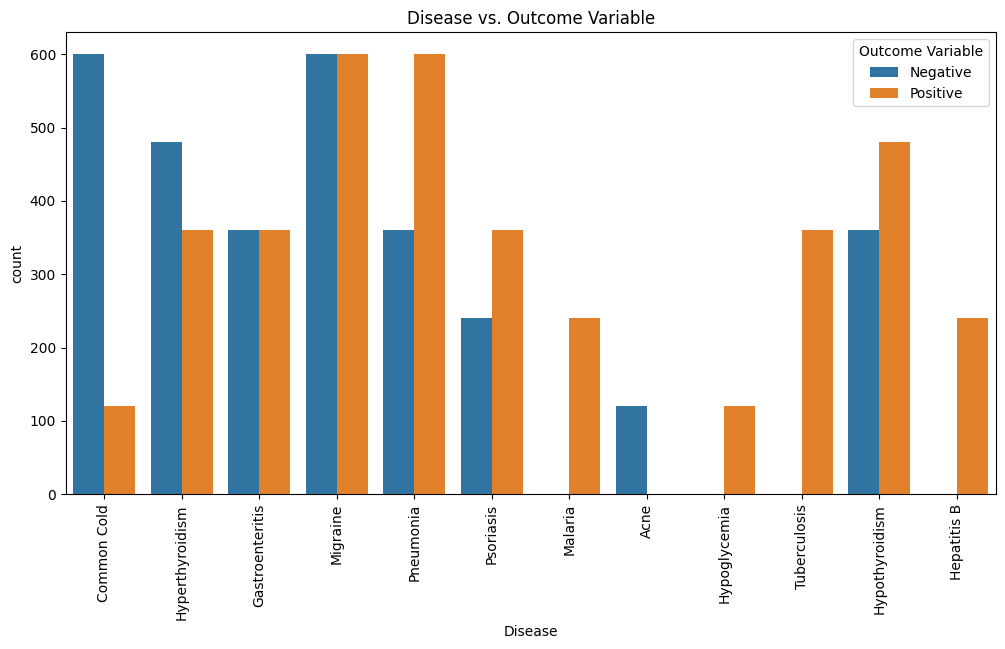

In [71]:
# Count Plot: Disease vs. Outcome Variable
plt.figure(figsize=(12, 6))
sns.countplot(x='Disease', hue='Outcome Variable', data=cleaned_df)
plt.title('Disease vs. Outcome Variable')
plt.xticks(rotation=90)
plt.show()

* Variability in Outcome Counts: The number of individuals with positive and negative outcomes varies significantly across different diseases. This suggests that the relationship between disease and outcome is complex.

* Dominance of Negative Outcomes: For most diseases, the count of negative outcomes is higher than the count of positive outcomes. This indicates a general trend towards negative outcomes across the studied population.

* Disease-Specific Patterns: Some diseases, such as Hyperthyroidism and Hypothyroidism, show a noticeable difference in outcome counts. This suggests potential associations between these specific diseases and the outcome variable.

* Disease-Specific Analysis: Focusing on diseases with notable differences in outcome counts can help identify potential risk factors or protective factors associated with the outcome.

Overall, the chart provides a preliminary overview of the relationship between disease and outcome. It highlights the variability across diseases and identifies potential areas for further investigation.

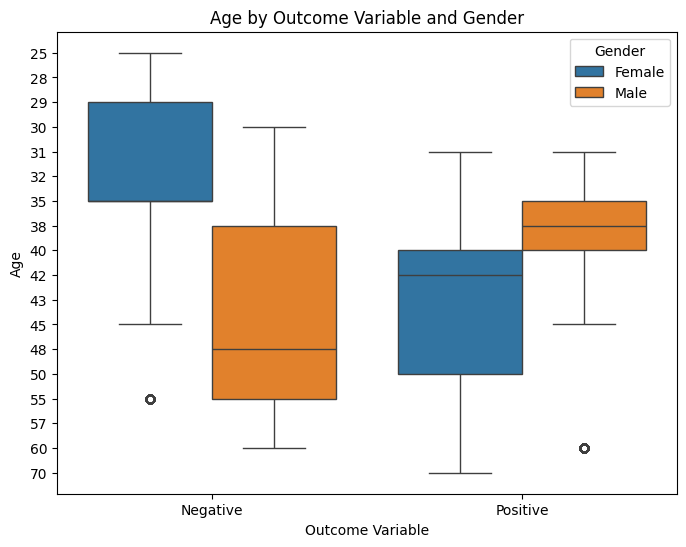

In [72]:
#Box Plot: Age by Outcome Variable and Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome Variable', y='Age', hue='Gender', data=cleaned_df)
plt.title('Age by Outcome Variable and Gender')
plt.show()

* Gender Differences: There appears to be a difference in age distribution between males and females for both outcome groups.
Females in the "Positive" outcome group tend to be slightly younger than males in the same group. The age range for females in the "Negative" outcome group is wider than that for males.

* Outcome Variable Differences: Individuals with a "Positive" outcome tend to be older on average compared to those with a "Negative" outcome, regardless of gender. The distribution of ages within each outcome group is relatively wide, indicating a diverse age range for both positive and negative outcomes.


* Potential Insights: Gender and Age Interaction: The interaction between gender and outcome variable on age suggests potential differences in disease progression or risk factors between males and females. Age as a Predictor: Older age seems to be associated with a higher likelihood of a "Positive" outcome, but this relationship is not strong due to overlapping age ranges.

Overall, the box plot provides a visual overview of the relationship between age, gender, and outcome variable.

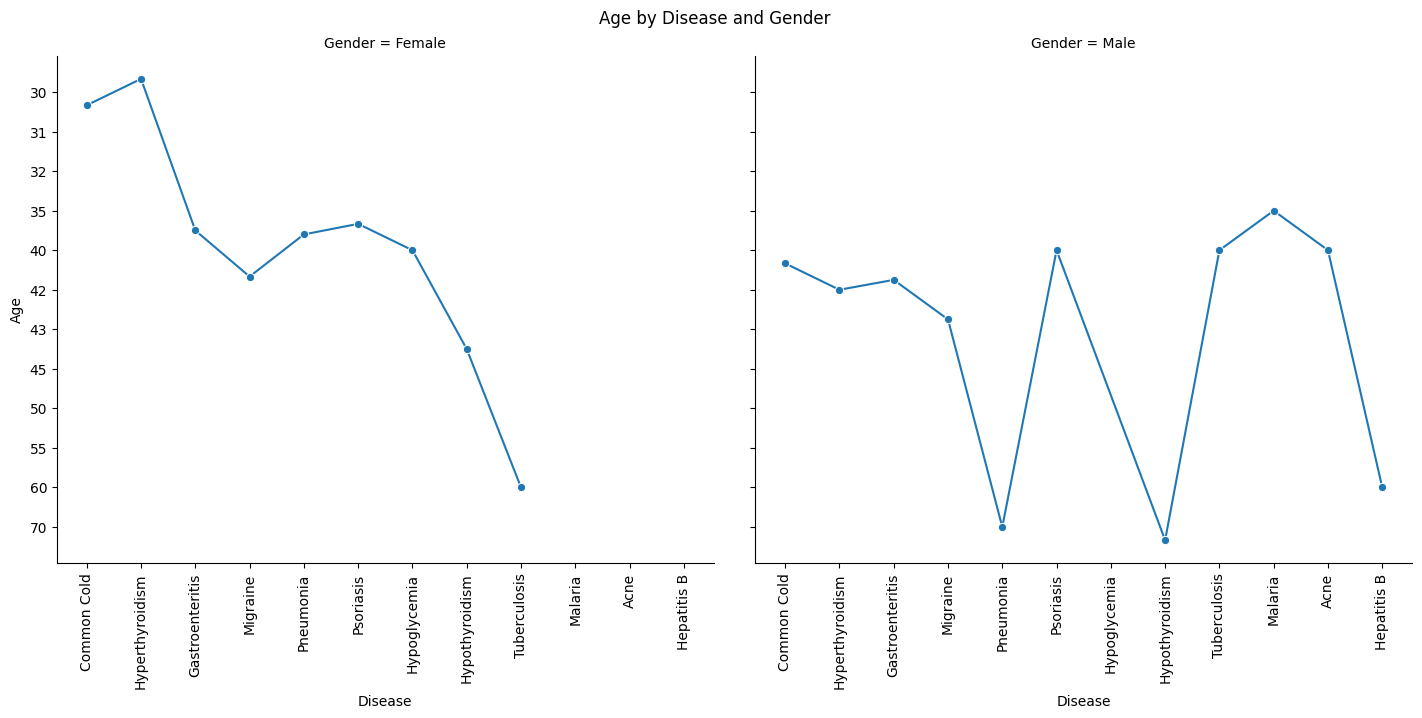

In [73]:
# Facet Grid: Age by Disease and Gender
g = sns.FacetGrid(cleaned_df, col="Gender", height=6, aspect=1.2)
g.map_dataframe(sns.lineplot, x="Disease", y="Age", marker="o", ci=None)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Age by Disease and Gender', y=1.02)
g.set_axis_labels("Disease", "Age")
plt.show()

* Gender Differences: There are noticeable differences in age distributions between males and females for specific diseases.For some diseases, like Hyperthyroidism and Hypothyroidism, females tend to be diagnosed at a younger age compared to males. In contrast, for diseases like Pneumonia and Tuberculosis, males appear to be diagnosed at a younger age.

* Disease-Specific Age Patterns: Certain diseases have a characteristic age distribution. For instance, Acne is primarily associated with younger individuals, while Tuberculosis and Pneumonia tend to affect older populations.

* Potential Insights:
Gender-Specific Disease Prevention: The observed gender differences in age at diagnosis suggest the need for targeted prevention strategies for certain diseases.

* Disease Risk Factors: Identifying age-related patterns for specific diseases can help uncover potential risk factors and inform early detection efforts.

Overall, the chart provides a preliminary overview of the relationship between age, gender, and disease.

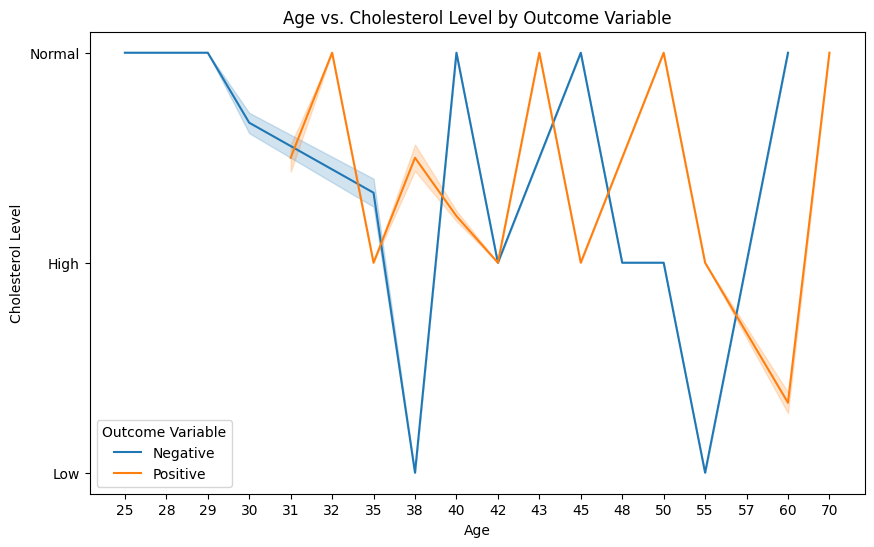

In [74]:
#Line Plot: Age vs. Cholesterol Level by Outcome Variable
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Cholesterol Level', hue='Outcome Variable', data=cleaned_df)
plt.title('Age vs. Cholesterol Level by Outcome Variable')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()

* Distinct Cholesterol Patterns: The cholesterol levels for individuals with negative and positive outcomes exhibit significantly different patterns across age groups. Early Age Cholesterol Spike: Individuals with a positive outcome show a sharp increase in cholesterol levels in the early adult years (around 30-35), followed by a decline.

* Stable Cholesterol for Negative Outcomes: The cholesterol levels for individuals with negative outcomes remain relatively stable across the age range, predominantly in the "Normal" category.

* Age-Related Cholesterol Changes: Both groups demonstrate some fluctuations in cholesterol levels with age, but the overall trend is more pronounced for the positive outcome group.

* Potential Insights:
Early Cholesterol Marker: The early cholesterol spike in individuals with a positive outcome could be a potential biomarker for identifying individuals at risk. Cholesterol Management: Focusing on cholesterol management in the early adult years for individuals at risk of a positive outcome might be beneficial in disease prevention.

Overall, the chart provides a preliminary overview of the relationship between age, cholesterol level, and outcome variable.

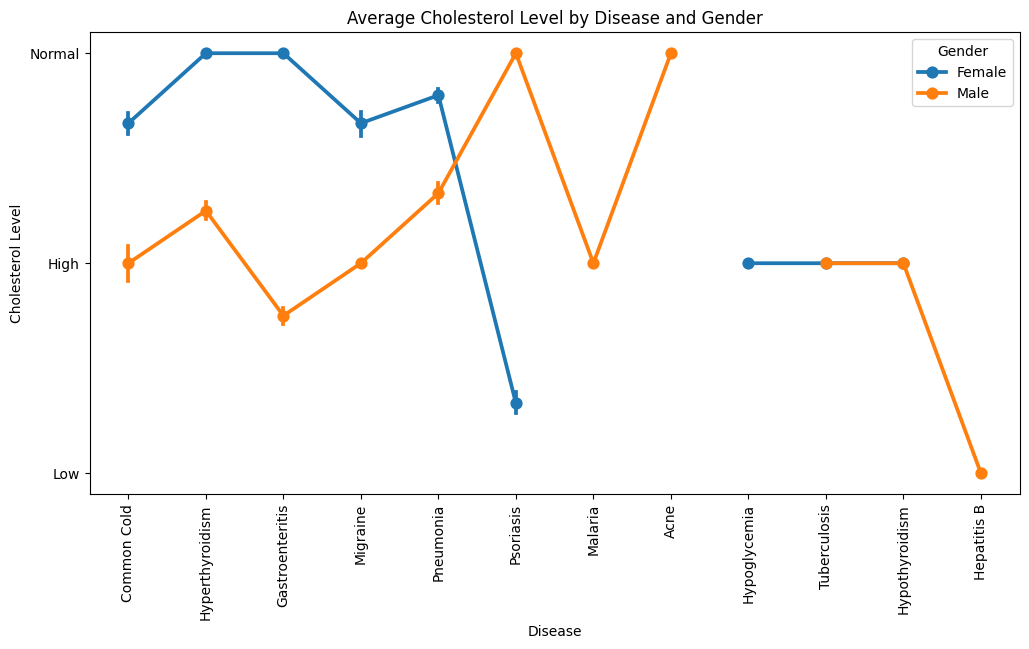

In [75]:
#Point Plot: Disease vs. Average Cholesterol Level by Gender
plt.figure(figsize=(12, 6))
sns.pointplot(x='Disease', y='Cholesterol Level', hue='Gender', data=cleaned_df, estimator=np.mean)
plt.title('Average Cholesterol Level by Disease and Gender')
plt.xticks(rotation=90)
plt.show()

* Gender Disparities: The chart clearly shows differences in average cholesterol levels between males and females for various diseases. While there isn't a consistent pattern favoring one gender across all diseases, some notable trends emerge.

* Disease-Specific Cholesterol Patterns: Certain diseases exhibit distinct cholesterol profiles. For instance, Psoriasis and Malaria are associated with significantly higher cholesterol levels compared to other diseases. Fluctuations in Cholesterol Levels: Cholesterol levels vary considerably across different diseases, with some diseases showing a higher prevalence of "High" cholesterol and others exhibiting predominantly "Normal" levels.

* Outliers: A few diseases, like Psoriasis and Malaria for both genders, and Hyperthyroidism for females, stand out with notably high cholesterol levels. These outliers warrant further investigation.
Potential Insights:

* Gender-Specific Cholesterol Management: The observed gender differences in cholesterol levels suggest the need for tailored prevention and management strategies for certain diseases.

* Disease-Focused Research: Identifying diseases associated with high cholesterol levels could guide further research into the underlying causes and potential interventions.

Overall, the chart provides a preliminary overview of the relationship between disease, gender, and cholesterol levels.

#####Word count for description and precaution columns

In [76]:
pip install wordcloud

In [77]:
# Combine all descriptions into a single string for Disease_Description
disease_text = " ".join(cleaned_df['Disease_Description'].astype(str).tolist())

KeyError: 'Disease_Description'

In [ ]:
# Generate word cloud for Disease_Description
wordcloud_disease = WordCloud(width=800, height=400, background_color='white').generate(disease_text)

In [ ]:
# Plot the word cloud for Disease_Description
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_disease, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Disease_Description')
plt.show()

* Respiratory System: Words like "lungs", "pneumonia", "alveoli", "breathe", "air" indicate a strong emphasis on respiratory conditions.

* Thyroid Disorders: Terms such as "thyroid", "hyperthyroidism", "hypothyroidism", "metabolism" highlight the prominence of thyroid-related issues.

* Pain and Discomfort: Words like "pain", "throbbing", "headache", "nausea", "vomiting" suggest that discomfort and pain are common symptoms associated with the described diseases.

* Infectious Diseases: Terms like "bacteria", "viruses", "infection" indicate a focus on infectious diseases as a significant category.
Specific Disease Mentions:

* Pneumonia: Clearly defined as an infection causing inflammation of the alveoli.

* Hyperthyroidism: Described as an overactive thyroid leading to symptoms like weight loss, rapid heartbeat, and sensitivity to heat.
Hypothyroidism: Described as an underactive thyroid leading to symptoms like fatigue, weight gain, and sensitivity to cold.

* Migraine: Characterized by severe throbbing headaches often accompanied by nausea and vomiting.

Overall Impression: The word cloud suggests a focus on common diseases with a particular emphasis on respiratory and thyroid conditions. The inclusion of symptoms and general medical terms indicates a broad scope of disease-related information.

In [ ]:
# Combine all descriptions into a single string for Precaution_Description
precaution_text = " ".join(cleaned_df['Precaution_Description'].astype(str).tolist())

In [ ]:
# Generate word cloud for Precaution_Description
wordcloud_precaution = WordCloud(width=800, height=400, background_color='white').generate(precaution_text)

In [ ]:
# Plot the word cloud for Precaution_Description
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_precaution, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Precaution_Description')
plt.show()

* Focus on Respiratory and Thyroid Health : The word cloud primarily emphasizes respiratory and thyroid health conditions. Terms like "lungs," "pneumonia," "alveoli," "thyroid," "hyperthyroidism," and "hypothyroidism" dominate the visualization. This suggests a potential focus on preventative measures or educational content related to these areas.

* Emphasis on Symptoms and Impact : Words like "pain," "inflammation," "difficulty," and "severe" highlight the potential severity of the conditions represented. This could indicate a need for content that addresses patient concerns and coping mechanisms.

* Infectious Disease Component : The presence of terms like "bacteria," "viruses," and "infection" suggests a focus on infectious diseases, particularly respiratory infections. This could be used to promote hygiene practices and vaccination.

Overall Impression:
The word cloud indicates a strong focus on respiratory and thyroid health, with an emphasis on the impact of these conditions on individuals.

In [78]:
cleaned_df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Description,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,fatigue,cough,high_fever,headache
2,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,fatigue,cough,high_fever,headache
3,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,chills,fatigue,cough,high_fever,headache,swelled_lymph_nodes
4,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,fatigue,cough,high_fever,headache,swelled_lymph_nodes
5,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,cough,high_fever,headache,swelled_lymph_nodes


#####Text preprocessing

In [79]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [80]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

In [81]:
# Preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back to string
    return ' '.join(tokens)

In [87]:
# Apply preprocessing to Disease_Description column
cleaned_df['processed_description'] = cleaned_df['Description'].apply(preprocess_text)

In [88]:
cleaned_df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Description,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,processed_description
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,fatigue,cough,high_fever,headache,common cold viral infection nose throat upper ...
2,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,fatigue,cough,high_fever,headache,common cold viral infection nose throat upper ...
3,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,chills,fatigue,cough,high_fever,headache,swelled_lymph_nodes,common cold viral infection nose throat upper ...
4,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,fatigue,cough,high_fever,headache,swelled_lymph_nodes,common cold viral infection nose throat upper ...
5,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,The common cold is a viral infection of your n...,continuous_sneezing,chills,cough,high_fever,headache,swelled_lymph_nodes,common cold viral infection nose throat upper ...


In [98]:
cleaned_df.drop('Description', axis=1, inplace=True)

In [99]:
cleaned_df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,processed_description
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,continuous_sneezing,chills,fatigue,cough,high_fever,headache,common cold viral infection nose throat upper ...
2,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,continuous_sneezing,chills,fatigue,cough,high_fever,headache,common cold viral infection nose throat upper ...
3,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,chills,fatigue,cough,high_fever,headache,swelled_lymph_nodes,common cold viral infection nose throat upper ...
4,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,continuous_sneezing,fatigue,cough,high_fever,headache,swelled_lymph_nodes,common cold viral infection nose throat upper ...
5,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,continuous_sneezing,chills,cough,high_fever,headache,swelled_lymph_nodes,common cold viral infection nose throat upper ...


#####TF-IDF Vectorizer

In [100]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [101]:
# Fit and transform the processed description text
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_df['processed_description'])

In [102]:
# Convert to DataFrame for easier handling
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [103]:
# Check the shape of the DataFrame
print(f"Shape of TF-IDF DataFrame: {tfidf_df.shape}")

Shape of TF-IDF DataFrame: (6960, 205)


In [104]:
# Display column names
print(f"Column names: {tfidf_df.columns.tolist()}")

Column names: ['abdominal', 'accelerate', 'accompanied', 'accompanying', 'acne', 'activity', 'adolescent', 'affect', 'air', 'also', 'although', 'alveolus', 'andor', 'anopheles', 'anywhere', 'appear', 'associated', 'attack', 'back', 'bacteria', 'bacterial', 'bite', 'blood', 'body', 'breathe', 'bumpy', 'called', 'cancer', 'cant', 'case', 'cause', 'caused', 'causing', 'cold', 'come', 'comedo', 'common', 'condition', 'contact', 'contaminated', 'covered', 'cramp', 'cyst', 'daily', 'day', 'deadly', 'develops', 'diabetes', 'diarrhea', 'difficult', 'digestive', 'disease', 'disorder', 'dont', 'drug', 'elbow', 'endocrine', 'energy', 'enough', 'extreme', 'face', 'failure', 'falciparum', 'family', 'fatal', 'feel', 'fill', 'fluid', 'follicle', 'form', 'formation', 'fungi', 'gastroenteritis', 'generally', 'gland', 'glucose', 'hair', 'happen', 'harmless', 'head', 'heartbeat', 'hepatitis', 'hormone', 'hour', 'hyperthyroidism', 'hypoglycemia', 'hypothyroidism', 'infection', 'infectious', 'inflammation'

#####Encode categorial columns

In [105]:
# Encode categorical columns excluding the outcome variable
categorical_cols = ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6']
encoder = OneHotEncoder(sparse=False)
encoded_categorical_matrix = encoder.fit_transform(cleaned_df[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical_matrix, columns=encoder.get_feature_names_out(categorical_cols))

In [106]:
list[encoded_categorical_df.columns.tolist()]

list[['Disease_Acne', 'Disease_Common Cold', 'Disease_Gastroenteritis', 'Disease_Hepatitis B', 'Disease_Hyperthyroidism', 'Disease_Hypoglycemia', 'Disease_Hypothyroidism', 'Disease_Malaria', 'Disease_Migraine', 'Disease_Pneumonia', 'Disease_Psoriasis', 'Disease_Tuberculosis', 'Fever_No', 'Fever_Yes', 'Cough_No', 'Cough_Yes', 'Fatigue_No', 'Fatigue_Yes', 'Difficulty Breathing_No', 'Difficulty Breathing_Yes', 'Gender_Female', 'Gender_Male', 'Blood Pressure_High', 'Blood Pressure_Low', 'Blood Pressure_Normal', 'Cholesterol Level_High', 'Cholesterol Level_Low', 'Cholesterol Level_Normal', 'Symptom_1_ acidity', 'Symptom_1_ chills', 'Symptom_1_ continuous_sneezing', 'Symptom_1_ fatigue', 'Symptom_1_ indigestion', 'Symptom_1_ joint_pain', 'Symptom_1_ mood_swings', 'Symptom_1_ pus_filled_pimples', 'Symptom_1_ skin_rash', 'Symptom_1_ sunken_eyes', 'Symptom_1_ vomiting', 'Symptom_1_ weight_gain', 'Symptom_1_itching', 'Symptom_2_ anxiety', 'Symptom_2_ blackheads', 'Symptom_2_ chills', 'Symptom_2_

In [107]:
# Convert 'Age' column to int
cleaned_df['Age'] = cleaned_df['Age'].astype(int)

In [108]:
# Combine numerical, categorical, and TF-IDF features
numerical_cols = ['Age']
numerical_df = cleaned_df[numerical_cols].reset_index(drop=True)

In [109]:
# Ensure 'Outcome Variable' is included as the target variable
outcome_df = cleaned_df[['Outcome Variable']].reset_index(drop=True)

In [110]:
# Combine all features
final_df = pd.concat([numerical_df, encoded_categorical_df, tfidf_df], axis=1)

In [111]:
final_df.head()

,Age,Disease_Acne,Disease_Common Cold,Disease_Gastroenteritis,Disease_Hepatitis B,Disease_Hyperthyroidism,Disease_Hypoglycemia,Disease_Hypothyroidism,Disease_Malaria,Disease_Migraine,...,unit,upper,usually,variety,viral,virus,vomiting,vulgaris,way,weight
0,25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.212734,0.144559,0.0,0.17594,0.156296,0.0,0.0,0.223253,0.0
1,25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.212734,0.144559,0.0,0.17594,0.156296,0.0,0.0,0.223253,0.0
2,25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.212734,0.144559,0.0,0.17594,0.156296,0.0,0.0,0.223253,0.0
3,25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.212734,0.144559,0.0,0.17594,0.156296,0.0,0.0,0.223253,0.0
4,25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.212734,0.144559,0.0,0.17594,0.156296,0.0,0.0,0.223253,0.0


In [112]:
# Check the data types of columns in final_df
for column in final_df.columns:
    print(f"Column '{column}' is of type '{final_df[column].dtype}'")

Column 'Age' is of type 'int64'
Column 'Disease_Acne' is of type 'float64'
Column 'Disease_Common Cold' is of type 'float64'
Column 'Disease_Gastroenteritis' is of type 'float64'
Column 'Disease_Hepatitis B' is of type 'float64'
Column 'Disease_Hyperthyroidism' is of type 'float64'
Column 'Disease_Hypoglycemia' is of type 'float64'
Column 'Disease_Hypothyroidism' is of type 'float64'
Column 'Disease_Malaria' is of type 'float64'
Column 'Disease_Migraine' is of type 'float64'
Column 'Disease_Pneumonia' is of type 'float64'
Column 'Disease_Psoriasis' is of type 'float64'
Column 'Disease_Tuberculosis' is of type 'float64'
Column 'Fever_No' is of type 'float64'
Column 'Fever_Yes' is of type 'float64'
Column 'Cough_No' is of type 'float64'
Column 'Cough_Yes' is of type 'float64'
Column 'Fatigue_No' is of type 'float64'
Column 'Fatigue_Yes' is of type 'float64'
Column 'Difficulty Breathing_No' is of type 'float64'
Column 'Difficulty Breathing_Yes' is of type 'float64'
Column 'Gender_Female' 

#####Assign X and y

In [113]:
X = final_df
y=outcome_df['Outcome Variable'].map({'Negative': 0, 'Positive': 1})

#####Split x_train and y_train

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#####Logistic Regression

In [115]:
# Apply Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [116]:
# Make predictions
y_pred = model.predict(X_test)

In [117]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9425287356321839


#####Confusion Matrix

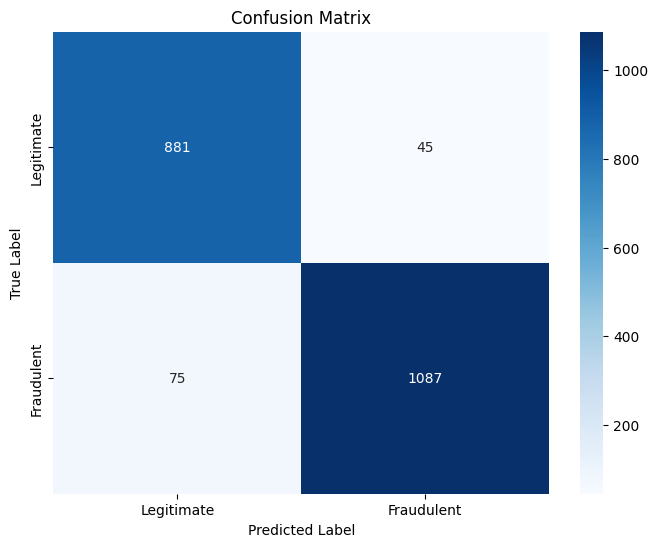

In [118]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In this confusion matrix:

- **True Negatives (TN):** 881
- **False Positives (FP):** 45
- **False Negatives (FN):** 75
- **True Positives (TP):** 1087

Here's what these values tell us:

1. **Accuracy:**
   - Formula: \((\text{TP} + \text{TN}) / (\text{TP} + \text{TN} + \text{FP} + \text{FN})\)
   - Accuracy: \((1087 + 881) / (1087 + 881 + 45 + 75) = 0.94\) or 94%
   - Your model correctly classifies 94% of the samples.

2. **Precision for Class 1 (Fraudulent):**
   - Formula: \(\text{TP} / (\text{TP} + \text{FP})\)
   - Precision: \(1087 / (1087 + 45) = 0.96\) or 96%
   - The model is very good at identifying fraudulent cases when it predicts them.

3. **Recall for Class 1 (Fraudulent):**
   - Formula: \(\text{TP} / (\text{TP} + \text{FN})\)
   - Recall: \(1087 / (1087 + 75) = 0.94\) or 94%
   - The model is effective at detecting most of the actual fraudulent cases.

4. **Precision for Class 0 (Legitimate):**
   - Formula: \(\text{TN} / (\text{TN} + \text{FN})\)
   - Precision: \(881 / (881 + 75) = 0.92\) or 92%
   - The model is also effective at classifying legitimate cases when it predicts them.

5. **Recall for Class 0 (Legitimate):**
   - Formula: \(\text{TN} / (\text{TN} + \text{FP})\)
   - Recall: \(881 / (881 + 45) = 0.95\) or 95%
   - The model is good at identifying most of the actual legitimate cases.

6. **F1-Score:**
   - The F1-score combines precision and recall into a single metric. For both classes, the F1-score is high, indicating a good balance between precision and recall.

**Insights:**
- **High Performance Overall:** The model performs well overall, with high accuracy, precision, and recall for both classes.
- **Class Imbalance:** There might be a class imbalance, as the model is better at detecting fraudulent cases (higher precision and recall) compared to legitimate cases. However, both classes have good performance metrics.
- **False Positives and Negatives:** There are 45 false positives (legitimate cases incorrectly labeled as fraudulent) and 75 false negatives (fraudulent cases incorrectly labeled as legitimate). While the false positives are relatively low, the model could be further fine-tuned to reduce the false negatives if needed.

Overall, your model appears to be effective, with strong performance metrics for both classes.

#####AUC-ROC Curve

In [119]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

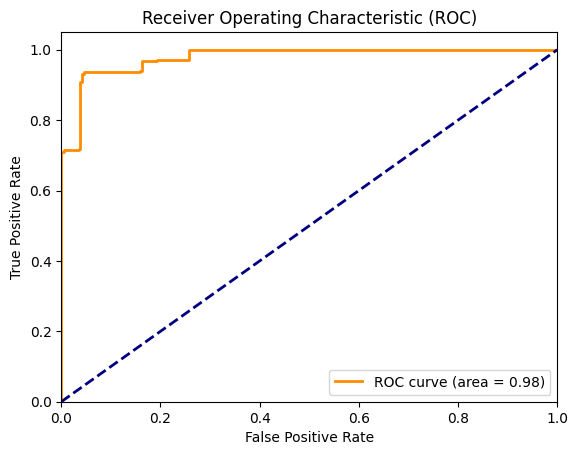

In [120]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

**Key Observations:**

1. **ROC Curve Shape:** The curve is significantly bowed upwards and close to the top-left corner of the plot. This indicates excellent performance of the classification model.

2. **Area Under the Curve (AUC):** The AUC is reported as 0.98. This value is very close to 1, confirming exceptional model performance. An AUC of 1 represents a perfect classifier, while 0.5 indicates random guessing.

3. **Trade-off between True Positive Rate (TPR) and False Positive Rate (FPR):** The ROC curve illustrates the balance between sensitivity (TPR) and specificity (1-FPR) at different classification thresholds. You can select a threshold that optimizes this trade-off based on your specific requirements.

**Interpretation:**

The ROC curve and AUC demonstrate that the classification model behind this plot has very strong predictive power. It effectively distinguishes between the positive and negative classes while maintaining a low rate of false positives.

**Additional Insights:**

- **Threshold Selection:** The optimal threshold for your application will depend on the relative costs of false positives and false negatives. You can choose a threshold that minimizes the overall error or loss function.

- **Comparison:** This ROC curve can be compared to those of other models to assess their relative performance.

**Overall, the ROC curve and AUC indicate a highly effective classification model.**

#####Classification Report

In [121]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       926
           1       0.96      0.94      0.95      1162

    accuracy                           0.94      2088
   macro avg       0.94      0.94      0.94      2088
weighted avg       0.94      0.94      0.94      2088



The classification report you've provided shows how well your model is performing on each class and overall. Here’s a breakdown of the metrics and insights:

### **Classification Report:**

1. **Class 0 (Legitimate Transactions):**
   - **Precision:** 0.92
     - **Interpretation:** When the model predicts a transaction as legitimate (class 0), it's correct 92% of the time.
   - **Recall:** 0.95
     - **Interpretation:** Of all actual legitimate transactions, the model successfully identified 95% of them.
   - **F1-Score:** 0.94
     - **Interpretation:** The harmonic mean of precision and recall, providing a balanced measure of the model's performance for class 0.

2. **Class 1 (Fraudulent Transactions):**
   - **Precision:** 0.96
     - **Interpretation:** When the model predicts a transaction as fraudulent (class 1), it’s correct 96% of the time.
   - **Recall:** 0.94
     - **Interpretation:** Of all actual fraudulent transactions, the model successfully identified 94% of them.
   - **F1-Score:** 0.95
     - **Interpretation:** The harmonic mean of precision and recall, providing a balanced measure of the model's performance for class 1.

3. **Overall Metrics:**
   - **Accuracy:** 0.94
     - **Interpretation:** The overall correctness of the model across all classes, 94% of the time.
   - **Macro Average:**
     - **Precision:** 0.94
     - **Recall:** 0.94
     - **F1-Score:** 0.94
     - **Interpretation:** The average performance of the model across both classes, treating each class equally.
   - **Weighted Average:**
     - **Precision:** 0.94
     - **Recall:** 0.94
     - **F1-Score:** 0.94
     - **Interpretation:** The average performance of the model weighted by the number of instances in each class.

### **Insights:**

1. **Balanced Performance:**
   - The model performs well for both classes, with high precision, recall, and F1-scores. This indicates that it is good at distinguishing between legitimate and fraudulent transactions.

2. **Class Imbalance Handling:**
   - Given the high performance metrics for both classes, model handles the class imbalance well. Both precision and recall are high for both classes, suggesting that the model is effectively distinguishing between the two types of transactions.

3. **Possible Improvements:**
   - **Threshold Tuning:** Even though the overall performance is good, you might experiment with adjusting the decision threshold to see if it further improves the balance between precision and recall, especially for class 1.
   - **Feature Engineering:** Consider if additional features or improvements in feature engineering could boost performance further, though current results are quite strong.

4. **Future Validation:**
   - **Cross-Validation:** Ensure that the model’s performance is consistent across different subsets of the data by using cross-validation.
   - **Real-World Testing:** Validate the model in a real-world setting or on a holdout set to confirm that it performs as expected in practical scenarios.

Overall, your model appears to be performing excellently based on the classification report.

#####Adjust the Threshold

In [122]:
y_prob = model.predict_proba(X_test)[:, 1]

In [123]:
threshold = 0.3
y_pred_new = (y_prob >= threshold).astype(int)

In [124]:
cm_new = confusion_matrix(y_test, y_pred_new)

In [125]:
print(confusion_matrix(y_test, y_pred_new))

[[ 743  183]
 [  35 1127]]


In [126]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       926
           1       0.86      0.97      0.91      1162

    accuracy                           0.90      2088
   macro avg       0.91      0.89      0.89      2088
weighted avg       0.90      0.90      0.89      2088



* After trying all threshold values, normal threshold 0.5 performance better

#####After feature scaling

In [127]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [129]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [130]:
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       926
           1       0.91      0.93      0.92      1162

    accuracy                           0.91      2088
   macro avg       0.91      0.91      0.91      2088
weighted avg       0.91      0.91      0.91      2088



##### Overall accuracy is 91%

#####Save model

In [131]:
import pickle

In [132]:
# Save TF-IDF Vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

In [133]:
# Save Standard Scaler
with open('standard_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [134]:
# Save Logistic Regression Model
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

#####Logistic Regression with cross validation

In [135]:
# Define the logistic regression model
logistic_model_tunning = LogisticRegression(solver='liblinear')

In [136]:
# Define the parameter grid
param_logreg = {
    'C': [1, 0.5, 0.1, 5, 9],
    'penalty': ['l1', 'l2']
}

In [137]:
# Initialize GridSearchCV
l_m_t = GridSearchCV(
    estimator=logistic_model_tunning,
    param_grid=param_logreg,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='recall',
    error_score='raise'
)

In [138]:
# Fit GridSearchCV
l_m_t.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, error_score='raise',
             estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9], 'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [139]:
# Get the best estimator
log_tuned = l_m_t.best_estimator_

In [140]:
# Make predictions
y_tuned_log = log_tuned.predict(X_test)
y_tuned_log_prob = log_tuned.predict_proba(X_test)[:, 1]

In [141]:
# Evaluation
print("Best Parameters:", l_m_t.best_params_)

Best Parameters: {'C': 0.5, 'penalty': 'l2'}


In [142]:
print("Best Cross-Validation Recall Score:", l_m_t.best_score_)

Best Cross-Validation Recall Score: 0.9383830724602747


###Confusion Matrix

In [143]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_tuned_log))

Confusion Matrix:
 [[ 858   68]
 [  75 1087]]


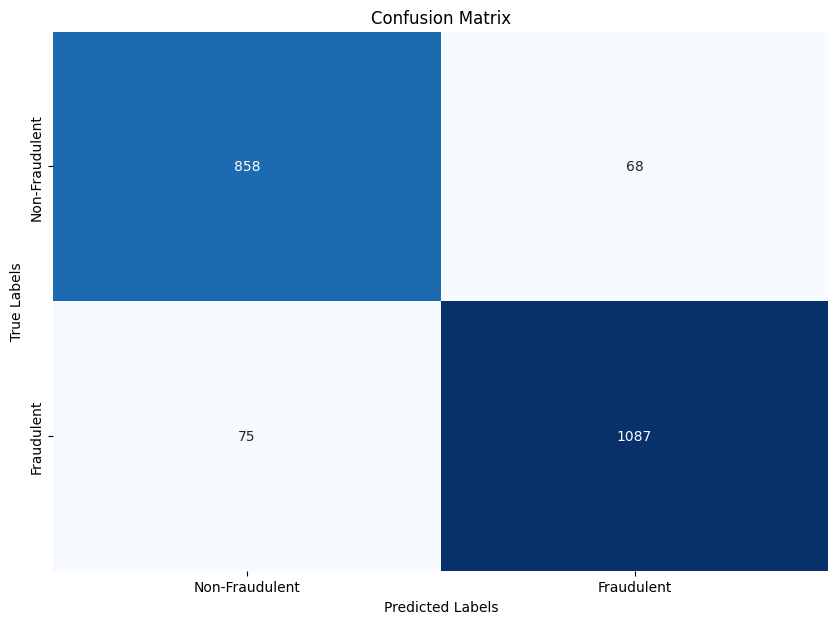

In [144]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_tuned_log)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### Insights:

- **False Positives** (68) are relatively low, which is good, indicating that the model rarely misclassifies negative cases as positive.
- **False Negatives** (75) are slightly higher, suggesting the model might miss some positive cases. Depending on your application's needs, you might want to reduce false negatives, possibly by adjusting the decision threshold.

Overall, your model is performing well, with high accuracy, precision, and recall. However, if reducing false negatives is critical, you might need to further fine-tune your model or consider other methods to address this.

#####AUC_ROC curve

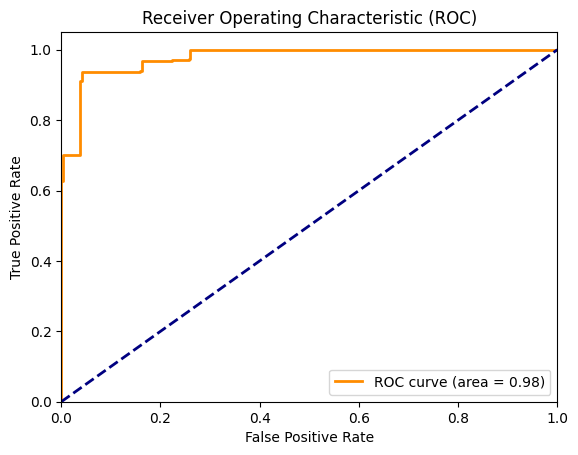

In [145]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_tuned_log_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Insights from the ROC Curve

**Good Model Performance**

The provided ROC curve indicates an exceptionally well-performing classification model. Here's a breakdown of the key observations:

* **High AUC:** The Area Under the Curve (AUC) is 0.98, very close to the perfect score of 1. This suggests that the model can effectively distinguish between positive and negative classes.
* **Steep Curve:** The ROC curve rises sharply towards the top-left corner, indicating a high true positive rate (sensitivity) with a low false positive rate (1 - specificity). This means the model is adept at identifying positive cases without falsely classifying negative ones.

**Interpretation:**

* The model demonstrates strong predictive power.
* It is likely to be highly accurate in classifying instances.
* You can confidently rely on its predictions for decision-making.

**Overall, the ROC curve provides compelling evidence of a robust and reliable classification model.**

###Classification Report

In [146]:
print("Classification Report:\n", classification_report(y_test, y_tuned_log))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       926
           1       0.94      0.94      0.94      1162

    accuracy                           0.93      2088
   macro avg       0.93      0.93      0.93      2088
weighted avg       0.93      0.93      0.93      2088



### Summary:

- **High Precision and Recall**: The model is performing well with high precision and recall for both classes. This means it is effective at correctly classifying both positive and negative cases.
- **Balanced F1-Score**: The F1-score is also high for both classes, reflecting a good balance between precision and recall.
- **Good Overall Accuracy**: The model achieves 93% accuracy, indicating strong overall performance.

Overall, your model is performing excellently with this classification report.

#####Save model

In [147]:
# Save the GridSearchCV model with the best parameters
with open('gridsearchcv_logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(l_m_t, f)

####xgb Model

In [148]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [149]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

In [150]:
# Evaluate the XGBoost model
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb_prob))
print("XGBoost Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost ROC AUC Score: 1.0
XGBoost Accuracy Score: 1.0
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       926
           1       1.00      1.00      1.00      1162

    accuracy                           1.00      2088
   macro avg       1.00      1.00      1.00      2088
weighted avg       1.00      1.00      1.00      2088



#####XGboost model overfits

#####Lightbgm

In [151]:
pip install --upgrade lightgbm

In [152]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [153]:
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': -1
}

In [154]:
# Train the model
lgb_model = lgb.train(params,
                      lgb_train,
                      valid_sets=[lgb_test],
                      num_boost_round=500)

In [155]:
# Make predictions
y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
y_pred_lgb_class = (y_pred_lgb >= 0.5).astype(int)

In [156]:
# Evaluate
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb_class))
print("LightGBM ROC AUC Score:", roc_auc_score(y_test, y_pred_lgb))

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       926
           1       1.00      1.00      1.00      1162

    accuracy                           1.00      2088
   macro avg       1.00      1.00      1.00      2088
weighted avg       1.00      1.00      1.00      2088

LightGBM ROC AUC Score: 1.0


#####LightGBM model Overfits

###LSTM

In [157]:
# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [158]:
# Reshape for LSTM (samples, timesteps, features)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [159]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train_reshaped.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))

In [160]:
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [161]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/20
122/122 - 12s - 100ms/step - accuracy: 0.7811 - loss: 0.4921 - val_accuracy: 0.8995 - val_loss: 0.2826
Epoch 2/20
122/122 - 1s - 9ms/step - accuracy: 0.9009 - loss: 0.2200 - val_accuracy: 0.9128 - val_loss: 0.1644
Epoch 3/20
122/122 - 2s - 13ms/step - accuracy: 0.9192 - loss: 0.1662 - val_accuracy: 0.9467 - val_loss: 0.1276
Epoch 4/20
122/122 - 2s - 18ms/step - accuracy: 0.9425 - loss: 0.1194 - val_accuracy: 0.9426 - val_loss: 0.1021
Epoch 5/20
122/122 - 2s - 14ms/step - accuracy: 0.9456 - loss: 0.1027 - val_accuracy: 0.9487 - val_loss: 0.0856
Epoch 6/20
122/122 - 2s - 15ms/step - accuracy: 0.9530 - loss: 0.0891 - val_accuracy: 0.9518 - val_loss: 0.0765
Epoch 7/20
122/122 - 3s - 22ms/step - accuracy: 0.9528 - loss: 0.0816 - val_accuracy: 0.9651 - val_loss: 0.0691
Epoch 8/20
122/122 - 2s - 20ms/step - accuracy: 0.9546 - loss: 0.0775 - val_accuracy: 0.9477 - val_loss: 0.0635
Epoch 9/20
122/122 - 2s - 14ms/step - accuracy: 0.9548 - loss: 0.0727 - val_accuracy: 0.9528 - val_loss

In [162]:
# Make predictions
y_pred_proba = model.predict(X_test_reshaped)

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


In [163]:
y_pred_proba.ndim

2

In [164]:
# Make predictions
y_pred_proba = model.predict(X_test_reshaped).flatten()

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [165]:
y_pred_proba.ndim

1

In [166]:
# Make predictions
y_pred_class = (y_pred_proba >= 0.5).astype(int)

In [167]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9684 - loss: 0.0382
Test Loss: 0.039157308638095856
Test Accuracy: 0.967432975769043


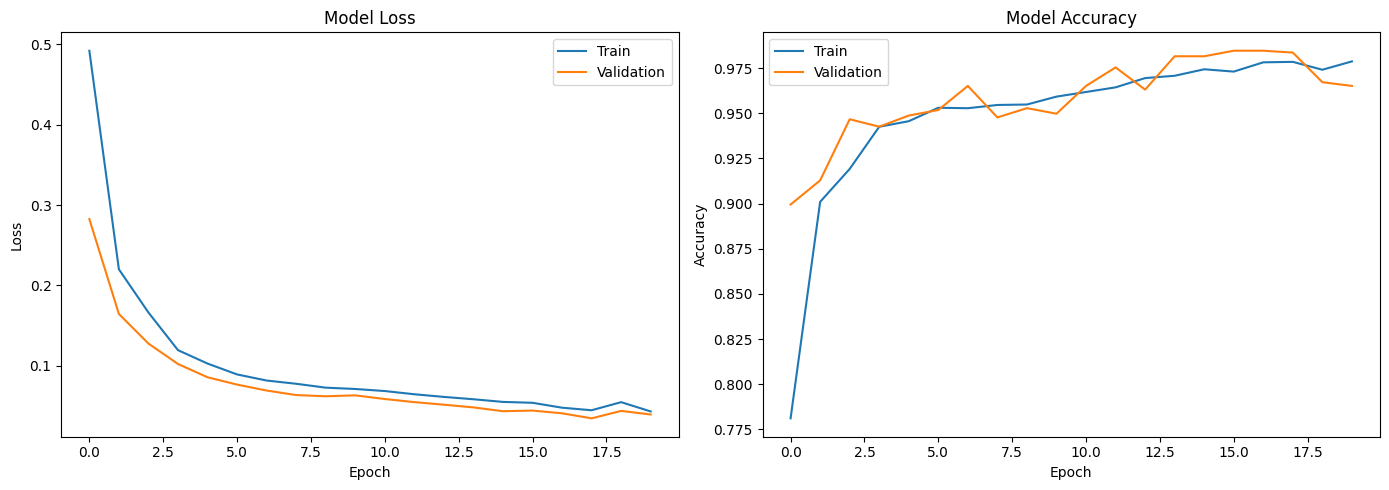

In [168]:
# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

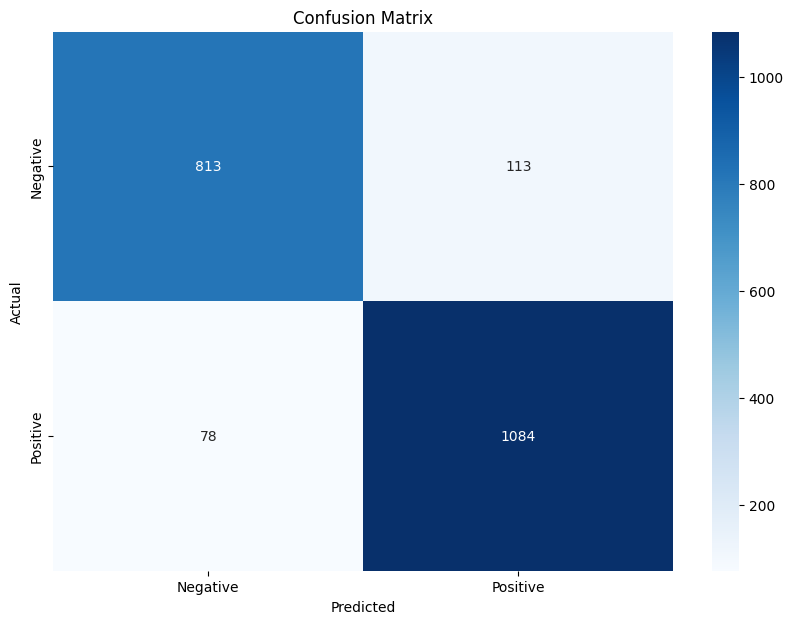

In [169]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

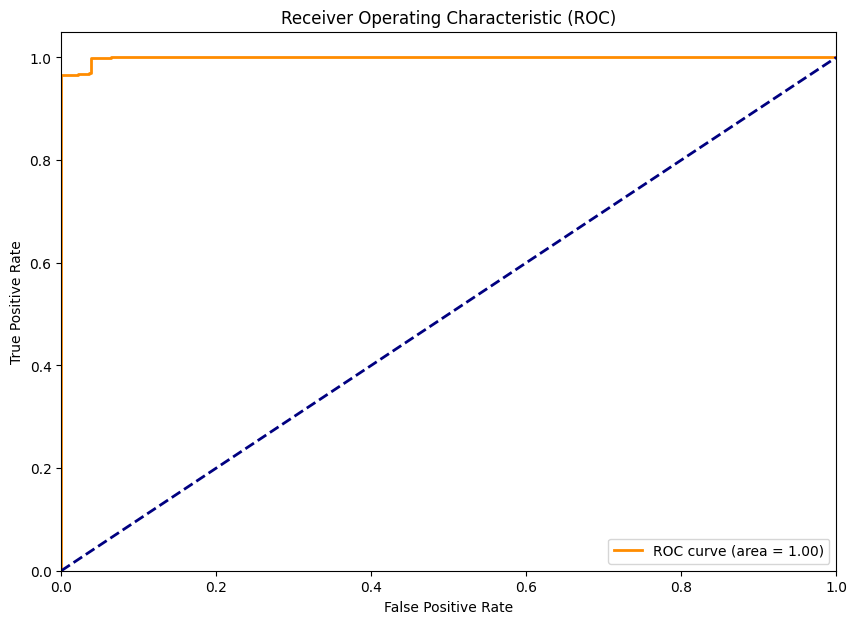

In [170]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [171]:
# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       926
           1       0.97      0.97      0.97      1162

    accuracy                           0.97      2088
   macro avg       0.97      0.97      0.97      2088
weighted avg       0.97      0.97      0.97      2088



#####Overall accuracy is 97%

In [172]:
# Save the model
model.save('lstm_model.h5')

### Summary
This project explores the prevalence and characteristics of various diseases, particularly focusing on migraine, pneumonia, and hypothyroidism. The analysis delves into the symptoms, age distribution, cholesterol levels, and blood pressure variability associated with these conditions. It also examines the relationship between gender, age, and health outcomes.

**Key Findings:**

1. **Prevalence of Diseases:**
   - **Migraine:** The most common condition, characterized by severe headaches often accompanied by nausea and vomiting.
   - **Pneumonia:** The second most common disease, an infection of the lungs causing cough and mucus production.
   - **Hypothyroidism:** The third most prevalent condition, caused by an underactive thyroid leading to various health issues.

2. **Demographic Insights:**
   - The majority of the population in the dataset is aged between 35 to 45 years.
   - High cholesterol levels are most common, followed by normal and low levels, with almost 50% of the data indicating high cholesterol.
   - The gender distribution is relatively balanced with 51.7% males and 48.3% females.
   - Positive health outcomes (indicating better health) are more common than negative outcomes, with 3900 positive and 3200 negative cases.

3. **Cholesterol and Blood Pressure Analysis:**
   - **Cholesterol:** Normal cholesterol is predominant across all age groups, but high cholesterol becomes more prevalent with age. Certain age groups (35, 40, 42) have particularly high cholesterol levels.
   - **Blood Pressure:** Blood pressure varies significantly across different age groups but remains within the normal range for most ages. The variability suggests potential influences from factors other than age alone.

4. **Health Outcomes:**
   - Positive health outcomes are more prevalent in males compared to females.
   - The distribution of positive and negative outcomes varies significantly across different diseases, with some diseases showing a higher prevalence of negative outcomes.

5. **Gender and Disease Patterns:**
   - There are noticeable differences in cholesterol and blood pressure levels between genders for certain diseases.
   - Females tend to be diagnosed with diseases like hyperthyroidism and hypothyroidism at a younger age compared to males.

### Conclusion
The data reveals significant insights into the prevalence and characteristics of various diseases, with a particular focus on migraine, pneumonia, and hypothyroidism. Symptoms such as headaches, nausea, and vomiting are common among these diseases. The analysis highlights the impact of age, gender, cholesterol levels, and blood pressure on health outcomes.

**Cholesterol Management:** There is a clear trend of increasing cholesterol levels with age, especially in certain age groups. This underscores the need for targeted cholesterol management strategies, particularly for middle-aged individuals.

**Blood Pressure Variability:** Blood pressure varies across different age groups, suggesting the influence of various factors. Further investigation into lifestyle, diet, and genetic factors could provide deeper insights.

**Gender-Specific Health Interventions:** The differences in disease prevalence and outcomes between genders indicate the necessity for gender-specific health interventions and preventive measures.

**Positive Health Outcomes:** The higher prevalence of positive health outcomes suggests that while some diseases have a significant impact, many individuals maintain good health despite the presence of certain conditions.

Overall, the findings emphasize the importance of personalized healthcare strategies, considering factors such as age, gender, and specific health conditions to improve disease management and health outcomes. Further research and targeted interventions can help address the identified health risks and improve the overall well-being of the population.